In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
#sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools
from bin_to_df import bin_to_df

import scipy.signal as signal

In [9]:
sbody = '2'
objname = '2'

#sbody = '2004KF19'
#objname = '2004KF19'
dt=500.
path = 'Sims/AstFam/'+objname
#path = 'TNOs/'+objname

#these arrays are all a bit of a mess, at some point would want to 
#change it to be a multi-dimensional array for the planets so they 
#don't all have to be handled by hand
a = np.zeros(1);e = np.zeros(1);inc = np.zeros(1);
p = np.zeros(1);q = np.zeros(1);h = np.zeros(1);k = np.zeros(1);
pu = np.zeros(1);qu = np.zeros(1);hu = np.zeros(1);ku = np.zeros(1);
pj = np.zeros(1);qj = np.zeros(1);hj = np.zeros(1);kj = np.zeros(1);
ps = np.zeros(1);qs = np.zeros(1);hs = np.zeros(1);ks = np.zeros(1);
pn = np.zeros(1);qn = np.zeros(1);hn = np.zeros(1);kn = np.zeros(1);
omega = np.zeros(1);
Omega = np.zeros(1);
M = np.zeros(1)
t = np.zeros(1);
fullfile = 'Sims/AstFam/2/archive_hires.bin'
print(fullfile)
arc1 = rebound.SimulationArchive(fullfile)
series = bin_to_df('AstFam',sbody,arc1,'8planet')
#series = pd.read_csv(path+'/series.csv')
t = series['t'].values
dt=int(t[1])
a = series['a'].values
e = series['ecc'].values
inc = series['inc'].values
#omega = series['omega'].values
#Omega = series['Omega'].values
#M = series['M'].values
h = series['h'].values
k = series['k'].values
p = series['p'].values
q = series['q'].values

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hmr = series['hmr'].values
kmr = series['kmr'].values
pmr = series['pmr'].values
qmr = series['qmr'].values

hv = series['hv'].values
kv = series['kv'].values
pv = series['pv'].values
qv = series['qv'].values

he = series['he'].values
ke = series['ke'].values
pe = series['pe'].values
qe = series['qe'].values

hmc = series['hmc'].values
kmc = series['kmc'].values
pmc = series['pmc'].values
qmc = series['qmc'].values

Sims/AstFam/2/archive_hires.bin


In [10]:
n = len(h)
freq = np.fft.rfftfreq(n,d=dt)

#particle eccentricity vectors
Yh= np.fft.rfft(h)
Yk = np.fft.rfft(k)
#giant planets
Yhmc = np.fft.rfft(hmc)
Yhv = np.fft.rfft(hv)
Yhe = np.fft.rfft(he)
Yhmr = np.fft.rfft(hmr)
Ykmc = np.fft.rfft(kmc)
Ykv = np.fft.rfft(kv)
Yke = np.fft.rfft(ke)
Ykmr = np.fft.rfft(kmr)
Yhu = np.fft.rfft(hu)
Yhj = np.fft.rfft(hj)
Yhn = np.fft.rfft(hn)
Yhs = np.fft.rfft(hs)
Yku = np.fft.rfft(ku)
Ykj = np.fft.rfft(kj)
Ykn = np.fft.rfft(kn)
Yks = np.fft.rfft(ks)

#convert to power
pYh = np.abs(Yh)
pYk = np.abs(Yk)

pYhmc = np.abs(Yhmc)
pYhv = np.abs(Yhv)
pYhe = np.abs(Yhe)
pYhmr = np.abs(Yhmr)
pYkmc = np.abs(Ykmc)
pYkmr = np.abs(Ykmr)
pYkv = np.abs(Ykv)
pYke = np.abs(Yke)

pYhu = np.abs(Yhu)
pYhn = np.abs(Yhn)
pYhj = np.abs(Yhj)
pYhs = np.abs(Yhs)
pYku = np.abs(Yku)
pYkn = np.abs(Ykn)
pYkj = np.abs(Ykj)
pYks = np.abs(Yks)


#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
kumax = pYku[1:].max()
knmax = pYkn[1:].max()
ksmax = pYks[1:].max()
kjmax = pYkj[1:].max()
humax = pYhu[1:].max()
hnmax = pYhn[1:].max()
hsmax = pYhs[1:].max()
hjmax = pYhj[1:].max()

kmcmax = pYkmc[1:].max()
kmrmax = pYkmr[1:].max()
kvmax = pYkv[1:].max()
kemax = pYke[1:].max()
hmcmax = pYhmc[1:].max()
hmrmax = pYhmr[1:].max()
hvmax = pYhv[1:].max()
hemax = pYhe[1:].max()

#(these need the plus 1 to account for neglecting the f=0 term)
ihmax = np.argmax(pYh[1:])+1
ikmax = np.argmax(pYk[1:])+1
ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 
ikumax = np.argmax(pYku[1:])+1 
iknmax = np.argmax(pYkn[1:])+1
iksmax = np.argmax(pYks[1:])+1
ikjmax = np.argmax(pYkj[1:])+1 

ihmcmax = np.argmax(pYhmc[1:])+1
ihmrmax = np.argmax(pYhmr[1:])+1 
ihvmax = np.argmax(pYhv[1:])+1 
ihemax = np.argmax(pYhe[1:])+1 
ikmcmax = np.argmax(pYkmc[1:])+1 
ikmrmax = np.argmax(pYkmr[1:])+1
ikvmax = np.argmax(pYkv[1:])+1
ikemax = np.argmax(pYke[1:])+1 


#particle inclination vectors
Yp= np.fft.rfft(p)
Yq = np.fft.rfft(q)
#giant planets
Ypu = np.fft.rfft(pu)
Ypj = np.fft.rfft(pj)
Ypn = np.fft.rfft(pn)
Yps = np.fft.rfft(ps)
Yqu = np.fft.rfft(qu)
Yqj = np.fft.rfft(qj)
Yqn = np.fft.rfft(qn)
Yqs = np.fft.rfft(qs)

Ypmc = np.fft.rfft(pmc)
Ypmr = np.fft.rfft(pmr)
Ypv = np.fft.rfft(pv)
Ype = np.fft.rfft(pe)
Yqmc = np.fft.rfft(qmc)
Yqmr = np.fft.rfft(qmr)
Yqv = np.fft.rfft(qv)
Yqe = np.fft.rfft(qe)

#convert to power
pYp = np.abs(Yp)
pYq = np.abs(Yq)
pYpu = np.abs(Ypu)
pYpn = np.abs(Ypn)
pYpj = np.abs(Ypj)
pYps = np.abs(Yps)
pYqu = np.abs(Yqu)
pYqn = np.abs(Yqn)
pYqj = np.abs(Yqj)
pYqs = np.abs(Yqs)

pYpmc = np.abs(Ypmc)
pYpmr = np.abs(Ypmr)
pYpv = np.abs(Ypv)
pYpe = np.abs(Ype)
pYqmc = np.abs(Yqmc)
pYqmr = np.abs(Yqmr)
pYqv = np.abs(Yqv)
pYqe = np.abs(Yqe)


#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
pumax = pYpu[1:].max()
pnmax = pYpn[1:].max()
psmax = pYps[1:].max()
pjmax = pYpj[1:].max()
qumax = pYqu[1:].max()
qnmax = pYqn[1:].max()
qsmax = pYqs[1:].max()
qjmax = pYqj[1:].max()

pmcmax = pYpmc[1:].max()
pmrmax = pYpmr[1:].max()
pvmax = pYpv[1:].max()
pemax = pYpe[1:].max()
qmcmax = pYqmc[1:].max()
qmrmax = pYqmr[1:].max()
qvmax = pYqv[1:].max()
qemax = pYqe[1:].max()

ipmax = np.argmax(pYp[1:])+1
iqmax = np.argmax(pYq[1:])+1
ipumax = np.argmax(pYpu[1:])+1
ipnmax = np.argmax(pYpn[1:])+1 
ipsmax = np.argmax(pYps[1:])+1 
ipjmax = np.argmax(pYpj[1:])+1 
iqumax = np.argmax(pYqu[1:])+1 
iqnmax = np.argmax(pYqn[1:])+1
iqsmax = np.argmax(pYqs[1:])+1
iqjmax = np.argmax(pYqj[1:])+1 

ipmcmax = np.argmax(pYpmc[1:])+1
ipmrmax = np.argmax(pYpmr[1:])+1 
ipvmax = np.argmax(pYpv[1:])+1 
ipemax = np.argmax(pYpe[1:])+1 
iqmcmax = np.argmax(pYqmc[1:])+1 
iqmrmax = np.argmax(pYqmr[1:])+1
iqvmax = np.argmax(pYqv[1:])+1
iqemax = np.argmax(pYqe[1:])+1 


print("peak planet eccentricity periods (years):")
print("Jupiter %f" % (1/freq[ikjmax]))
print("Saturn %f" % (1/freq[iksmax]))
print("Uranus %f" % (1/freq[ikumax]))
print("Neptune %f" % (1/freq[iknmax]))

peak planet eccentricity periods (years):
Jupiter 72463.840580
Saturn 303030.606061
Uranus 45871.605505
Neptune 303030.606061


500001


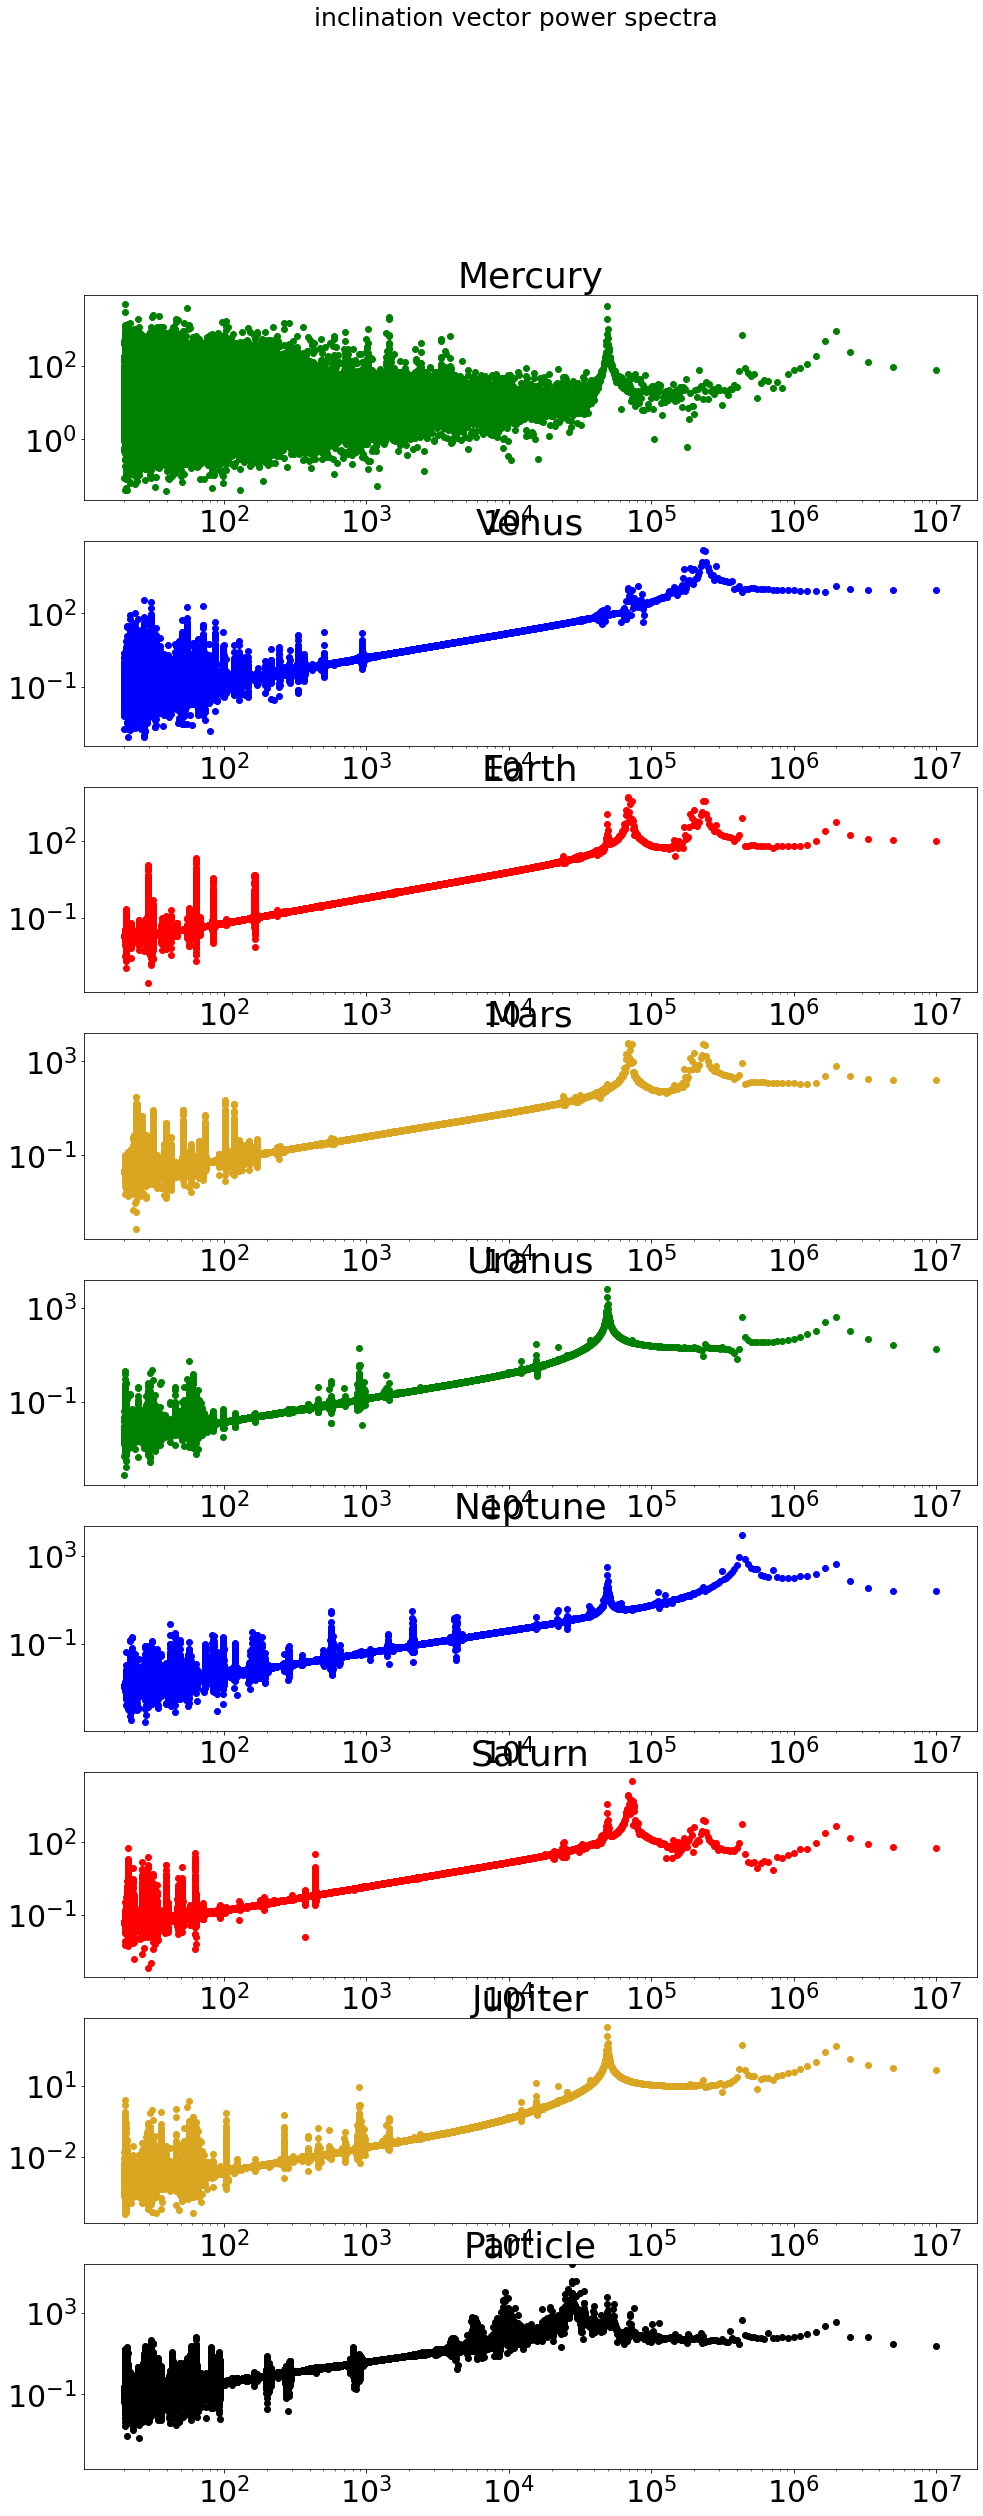

In [11]:
print(len(pYpj))
fig,ax = plt.subplots(9,figsize=(16,40))
ax[0].scatter(1/freq[1:],pYpmc[1:],label='mc',c='g')
ax[1].scatter(1/freq[1:],pYpv[1:],label='v',c='b')
ax[3].scatter(1/freq[1:],pYpe[1:],label='e',c='goldenrod')
ax[2].scatter(1/freq[1:],pYpmr[1:],label='mr',c='r')

ax[4].scatter(1/freq[1:],pYpu[1:],label='u',c='g')
ax[5].scatter(1/freq[1:],pYpn[1:],label='n',c='b')
ax[7].scatter(1/freq[1:],pYps[1:],label='s',c='goldenrod')
ax[6].scatter(1/freq[1:],pYpj[1:],label='j',c='r')


ax[8].scatter(1/freq[1:],pYp[1:],label='j',c='k')

ax[0].set_title('Mercury')
ax[1].set_title('Venus')
ax[2].set_title('Earth')
ax[3].set_title('Mars')

ax[4].set_title('Uranus')
ax[5].set_title('Neptune')
ax[7].set_title('Jupiter')
ax[6].set_title('Saturn')

ax[8].set_title('Particle')
#plt.scatter(1/freq[1:],pYp[1:],label='particle',c='k')
fig.suptitle('inclination vector power spectra',fontsize=25)
#plt.legend(loc='lower right')


#plt.axvline(x=1/freq[ipumax],c='g')
#plt.axvline(x=1/freq[ipjmax],c='r')
#plt.axvline(x=1/freq[ipsmax],c='goldenrod')
#plt.axvline(x=1/freq[ipnmax],c='b')

#plt.xlabel('period (yr)')
#plt.ylabel('Fourier Amplitude')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[3].set_yscale('log')
ax[3].set_xscale('log')

ax[4].set_yscale('log')
ax[4].set_xscale('log')
ax[5].set_yscale('log')
ax[5].set_xscale('log')
ax[6].set_yscale('log')
ax[6].set_xscale('log')
ax[7].set_yscale('log')
ax[7].set_xscale('log')

ax[8].set_yscale('log')
ax[8].set_xscale('log')
maxp = np.max([humax,hsmax,hjmax,hnmax,pYh[1:].max()])

plt.ylim([0.00002,2*maxp]);

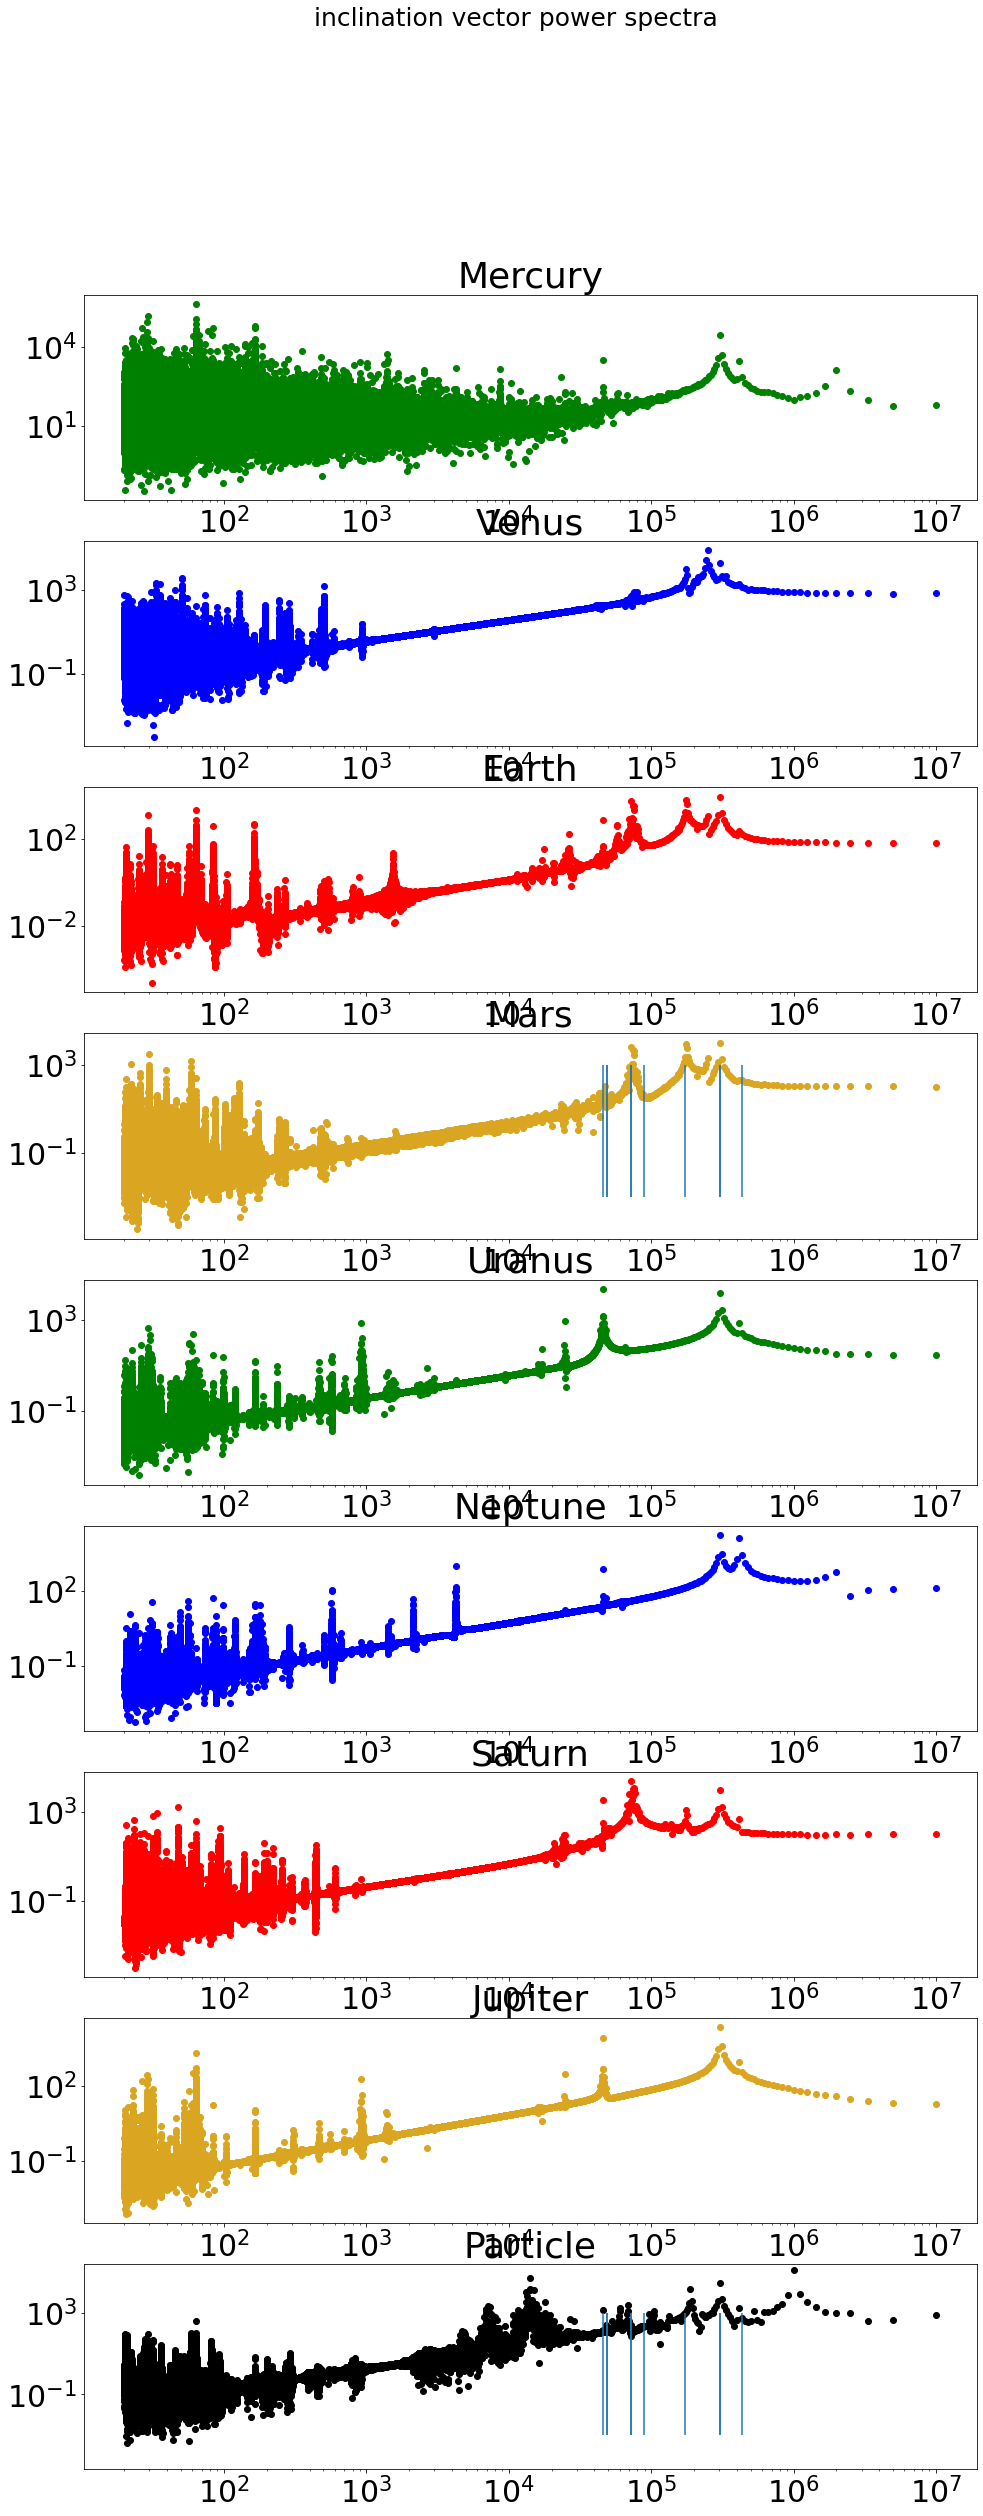

In [17]:
fig,ax = plt.subplots(9,figsize=(16,40))
ax[0].scatter(1/freq[1:],pYhmc[1:],label='mc',c='g')
ax[1].scatter(1/freq[1:],pYhv[1:],label='v',c='b')
ax[3].scatter(1/freq[1:],pYhe[1:],label='e',c='goldenrod')
ax[2].scatter(1/freq[1:],pYhmr[1:],label='mr',c='r')

ax[4].scatter(1/freq[1:],pYhu[1:],label='u',c='g')
ax[5].scatter(1/freq[1:],pYhn[1:],label='n',c='b')
ax[7].scatter(1/freq[1:],pYhs[1:],label='s',c='goldenrod')
ax[6].scatter(1/freq[1:],pYhj[1:],label='j',c='r')

#g = freq[2101]
rev = 1296000
g = freq[ihmax]
s = freq[ipmax]

g5 = freq[ihjmax]
g6 = freq[ihsmax]
g7 = freq[ihumax]
g8 = freq[ihnmax]
s5 = 0
s6 = freq[ipsmax]
s7 = freq[ipumax]
s8 = freq[ipnmax]

z1 = 2*g6-g5
z2 = 2*g6-g7
z3 = -2*g5+3*g6
z4 = -g5+g6+g7
z5 = g5+g6-g7
z6 = -g5+2*g6+s6-s7
z7 = g5-s6+s7
z8 = 2*g5-g7

kandm = [g-g5+s-s6,g-g6,g+g5-2g6,2*g-2*g6+s-s6,g+g5-2*g6,g-g6+s-s6,g+2*g5-3*g6]

carruba = [g − 2*g5 − g6 + 2*g7,s − s6 + g6 − g7 ,2*g − g6 − g4 + s − s4 ,2*g − 2*g6 + g5 − g4 ,s − s6 − g5 + g6 ,2*g − g6 − g7 + s − s7 ,2*g − 2*g6 + g7 − g4 ,s − 2*s6 + s7 ,2*g − g5 − g6 + s − s7 ,2*g − 3*g6 + g4 ,s − 2*s6 + s4 ,2*(g − g6) + s − s6,g + 2*g5 − 3*g4 ,s − s6 − g7 + g4,g − g4 + 2*s − 2*s6 ,g + g5 + g7 − 3*g4 ,s − s6 + g6 − g4 ,g − g5 + 2*s − s6 − s4 ,g + g5 − g6 − g4,s − s4 − g5 + g6 ,g − g7 + 2*s − s6 − s4 ,g + g5 − 2*g6 − g7 + g4 ,s − s4 + g6 − g7 ,g − g5 + 2*s − 2*s6 ,g + 2*g7 − 3*g4 ,g − g7 + 2*s − 2*s6 ,g − g6 + g7 − g4 ,g − 2*g6 + g4]
'''
g5 = 4.24/rev
g6 = 28.22/rev
g7 = 3.08/rev
g8 = 0.67/rev
s6 = 26.34/rev
s7 = 2.99/rev
s8 = 0.69/rev
'''
'''
g5 = 4.25749319/rev
g6 = 28.24552984/rev
g7 = 3.08675577/rev
g8 = 0.67255084/rev
s6 = -26.34496354/rev
s7 = -2.99266093/rev
s8 = -0.69251386/rev

z1 = 2*g6-g5
z2 = 2*g6-g7
z3 = -2*g5+3*g6
z4 = -g5+g6+g7
z5 = g5+g6-g7
z6 = -g5+2*g6+s6-s7
z7 = g5-s6+s7
z8 = 2*g5-g7

#z9 = abs(g+s-g6-s6)
#z10 = abs(g+s-g5-s7)
#z11 = abs(g+s-g5-s6)
#z12 = abs(g-2*g6+g5)
#z13 = abs(g-2*g6+g7)
#z14 = abs(s-s6-g5+g6)
#z15 = abs(g-3*g6+2*g5)
#z16 = abs(2*(g-g6)+s-s6)
#z17 = abs(3*(g-g6)+s-s6)
#'''
ax[8].scatter(1/freq[1:],pYh[1:],label='j',c='k')
#'''
#'''
ax[3].vlines(1/g5,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/g6,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/g7,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/g8,ymin=1e-3,ymax=1e3)

ax[3].vlines(1/s6,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/s7,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/s8,ymin=1e-3,ymax=1e3)

ax[3].vlines(1/z1,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/z2,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/z3,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/z4,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/z5,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/z6,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/z7,ymin=1e-3,ymax=1e3)
ax[3].vlines(1/z8,ymin=1e-3,ymax=1e3)
#ax[3].vlines(1/z9,ymin=1e-3,ymax=1e3)
#'''
ax[8].vlines(1/g5,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/g6,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/g7,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/g8,ymin=1e-3,ymax=1e3)

ax[8].vlines(1/s6,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/s7,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/s8,ymin=1e-3,ymax=1e3)

ax[8].vlines(1/z1,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/z2,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/z3,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/z4,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/z5,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/z6,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/z7,ymin=1e-3,ymax=1e3)
ax[8].vlines(1/z8,ymin=1e-3,ymax=1e3)
#ax[8].vlines(1/z9,ymin=1e-3,ymax=1e3)
#'''

ax[0].set_title('Mercury')
ax[1].set_title('Venus')
ax[2].set_title('Earth')
ax[3].set_title('Mars')

ax[4].set_title('Uranus')
ax[5].set_title('Neptune')
ax[7].set_title('Jupiter')
ax[6].set_title('Saturn')

ax[8].set_title('Particle')


'''
g=g*rev
s=s*rev
g5=g5*rev
g6=g6*rev
g7=g7*rev
g8=g8*rev
s6=s6*rev
s7=s7*rev
s8=s8*rev

de = np.array([g-g5,g-g6,g5-g6,s-s7,s-s6,s7-s6,g+s-s7-g5,g+s-s7-g6,g+s-s6-g5,g+s-s6-g6,2*g-2*s,g-2*g5+g6,g+g5-2*g6,2*g-g5-g6,-g+s+g5-s7,-g+s+g6-s7,-g+s+g5-s6,-g+s+g6-s6,g-g5+s7-s6,g-g5-s7+s6,g-g6+s7-s6,g-g6-s7+s6,2*g-s-s7,2*g-s-s6,-g+2*s-g5,-g+2*s-g6,2*g-2*s7,2*g-2*s6,2*g-s7-s6,g-s+g5-s7,g-s+g5-s6,g-s+g6-s7,g-s+g6-s6,g+g5-2*s7,g+g6-2*s7,g+g5-2*s6,g+g6-2*s6,g+g5-s7-s6,g+g6-s7-s6,s-2*s7+s6,s+s7-2*s6,2*s-s7-s6,s+g5-g6-s7,s-g5+g6-s7,s+g5-g6-s6,s-g5+g6-s6,2*s-2*g5,2*s-2*g6,2*s-g5-g6,s-2*g5+s7,s-2*g5+s6,s-2*g6+s7,s-2*g6+s6,s-g5-g6+s7,s-g5-g6+s6,2*g-2*g5,2*g-2*g6,2*s-2*s7,2*s-2*s6,g-2*g6+g7,g-3*g6+2*g5,2*(g-g6)+(s-s6),g+g5-g6-g7,g-g5-g6+g7,g+g5-2*g6-s6+s7,3*(g-g6)+(s-s6)])/rev
#'''

#for i in range(len(de)):  
#    ax[8].vlines(1/de[i],ymin=1e-3,ymax=1e3)

#plt.scatter(1/freq[1:],pYp[1:],label='particle',c='k')
fig.suptitle('inclination vector power spectra',fontsize=25)
#plt.legend(loc='lower right')


#plt.axvline(x=1/freq[ipumax],c='g')
#plt.axvline(x=1/freq[ipjmax],c='r')
#plt.axvline(x=1/freq[ipsmax],c='goldenrod')
#plt.axvline(x=1/freq[ipnmax],c='b')

#plt.xlabel('period (yr)')
#plt.ylabel('Fourier Amplitude')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[3].set_yscale('log')
ax[3].set_xscale('log')

ax[4].set_yscale('log')
ax[4].set_xscale('log')
ax[5].set_yscale('log')
ax[5].set_xscale('log')
ax[6].set_yscale('log')
ax[6].set_xscale('log')
ax[7].set_yscale('log')
ax[7].set_xscale('log')

ax[8].set_yscale('log')
ax[8].set_xscale('log')

maxp = np.max([humax,hsmax,hjmax,hnmax,pYh[1:].max()])

plt.ylim([0.00002,2*maxp]);

NameError: name 'z9' is not defined

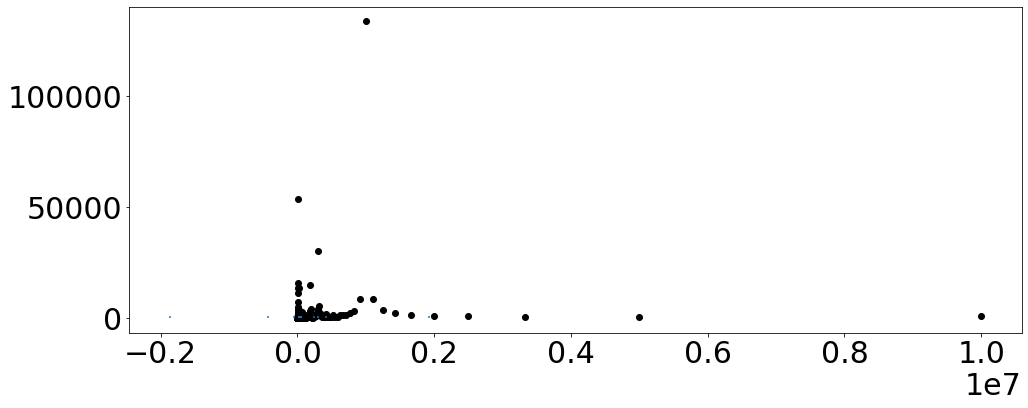

In [13]:
plt.figure(figsize=(16,6))
plt.scatter(1/freq[1:],pYh[1:],label='j',c='k')

v1 = g - g5
v2 = g - g6
v3 = s - s6

#'''
plt.vlines(1/g5,ymin=1e-3,ymax=1e3)
plt.vlines(1/g6,ymin=1e-3,ymax=1e3)
plt.vlines(1/g7,ymin=1e-3,ymax=1e3)
plt.vlines(1/g8,ymin=1e-3,ymax=1e3)

plt.vlines(1/s6,ymin=1e-3,ymax=1e3)
plt.vlines(1/s7,ymin=1e-3,ymax=1e3)
plt.vlines(1/s8,ymin=1e-3,ymax=1e3)

plt.vlines(1/z1,ymin=1e-3,ymax=1e3)
plt.vlines(1/z2,ymin=1e-3,ymax=1e3)
plt.vlines(1/z3,ymin=1e-3,ymax=1e3)
plt.vlines(1/z4,ymin=1e-3,ymax=1e3)
plt.vlines(1/z5,ymin=1e-3,ymax=1e3)
plt.vlines(1/z6,ymin=1e-3,ymax=1e3)
plt.vlines(1/z7,ymin=1e-3,ymax=1e3)
plt.vlines(1/z8,ymin=1e-3,ymax=1e3)
plt.vlines(1/z9,ymin=1e-3,ymax=1e3)
#'''

plt.vlines(1/v1,ymin=1e-3,ymax=1e3)
plt.vlines(1/v2,ymin=1e-3,ymax=1e3)
plt.vlines(1/v3,ymin=1e-3,ymax=1e3)


#plt.vlines(1/s,ymin=1e-3,ymax=1e3)
start = 2000
end = 2500
freqmax = 1/freq[np.argmax(pYh[start:end])+start]
print(np.argmax(pYh[start:end])+start)
print(freqmax)

#plt.vlines(freqmax,ymin=1e-3,ymax=1e3)



plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
print(1/g,1/s)
print(1/g5,1/g6,1/g7,1/g8,1/s6,1/s7,1/s8)
print(1/z1,1/z2,1/z3,1/z4,1/z5,1/z6,1/z7,1/z8,1/z9)

In [ ]:
print(freq,len(freq))
print(ihjmax,ihsmax,ihumax,ihnmax)

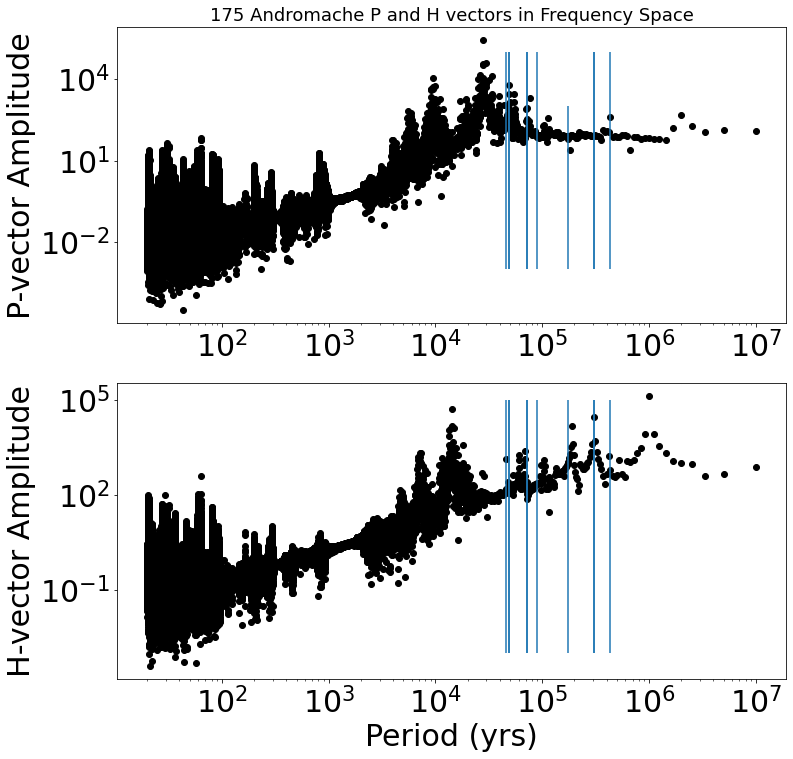

In [20]:
fig,ax = plt.subplots(2,figsize=(12,12))
plt.rcParams['font.size'] = 30
ax[0].scatter(1/freq[1:],pYq[1:],label='j',c='k')
ax[1].scatter(1/freq[1:],pYh[1:],label='j',c='k')

ax[0].vlines(1/g5,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/g6,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/g7,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/g8,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/s6,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/s7,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/s8,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/z1,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/z2,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/z3,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/z4,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/z5,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/z6,ymin=1e-3,ymax=1e5)
ax[0].vlines(1/z7,ymin=1e-3,ymax=1e5)
#ax[0].vlines(1/z3+1000,ymin=1e-3,ymax=1e3)
#ax[0].vlines(1/z4+1000,ymin=1e-3,ymax=1e3)
#ax[0].vlines(1/z5+1000,ymin=1e-3,ymax=1e3)
#ax[0].vlines(1/z6+1000,ymin=1e-3,ymax=1e3)
#ax[0].vlines(1/z7+1000,ymin=1e-3,ymax=1e3)
ax[0].vlines(1/z8,ymin=1e-3,ymax=1e3)

ax[1].vlines(1/g5,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/g6,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/g7,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/g8,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/s6,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/s7,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/s8,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z1,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z2,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z3,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z4,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z5,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z6,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z7,ymin=1e-3,ymax=1e5)
ax[1].vlines(1/z8,ymin=1e-3,ymax=1e5)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
#ax[0].set_xlim(10000,20000)

ax[0].set_ylabel('P-vector Amplitude')
ax[1].set_ylabel('H-vector Amplitude')
ax[1].set_xlabel('Period (yrs)')
ax[0].set_title('175 Andromache P and H vectors in Frequency Space',fontsize=18)
plt.show()

In [35]:
print(1/np.array([z1,z2,z3,z4,z5,z6,z7,z8]))

[ 24811.63142954  24267.70700324  17003.05355189  47867.40300334
  44057.25541399  44873.38245947  46939.86182976 238751.83151071]


In [31]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
#sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools
from bin_to_df import bin_to_df

import scipy.signal as signal

sbody = '2'
objname = '2'

#sbody = '2004KF19'
#objname = '2004KF19'
dt=100.
path = 'Sims/AstFam/'+objname
#path = 'TNOs/'+objname

#these arrays are all a bit of a mess, at some point would want to 
#change it to be a multi-dimensional array for the planets so they 
#don't all have to be handled by hand
a = np.zeros(1);e = np.zeros(1);inc = np.zeros(1);
p = np.zeros(1);q = np.zeros(1);h = np.zeros(1);k = np.zeros(1);
pu = np.zeros(1);qu = np.zeros(1);hu = np.zeros(1);ku = np.zeros(1);
pj = np.zeros(1);qj = np.zeros(1);hj = np.zeros(1);kj = np.zeros(1);
ps = np.zeros(1);qs = np.zeros(1);hs = np.zeros(1);ks = np.zeros(1);
pn = np.zeros(1);qn = np.zeros(1);hn = np.zeros(1);kn = np.zeros(1);
omega = np.zeros(1);
Omega = np.zeros(1);
M = np.zeros(1)
t = np.zeros(1);
fullfile = 'Sims/AstFam/2/archive_megno.bin'
print(fullfile)
arc2 = rebound.SimulationArchive(fullfile)
series = bin_to_df('AstFam',sbody,arc2,'8planet')

Sims/AstFam/2/archive_megno.bin


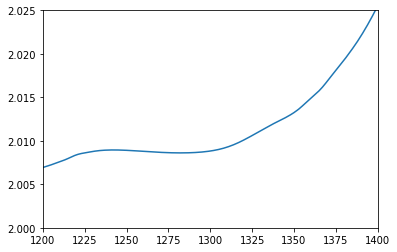

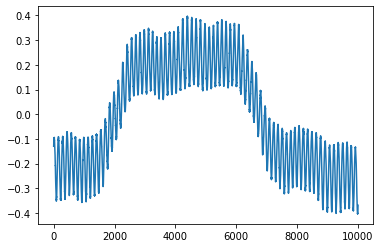

In [54]:
plt.plot(series['megno'])
plt.xlim(1200,1400)
plt.ylim(2.0,2.025)
plt.show()
plt.plot(series['k'])
plt.show()

20
c_uint(3917228494)
<rebound.particle.Particle object at 0x7f5356797510, m=1.0 x=-0.0029178693632295545 y=0.007527400889629104 z=5.5230373231491846e-05 vx=-0.0027242774627240407 vy=-0.00030424020201443025 vz=7.09546645526621e-05>
c_uint(387509886)
<rebound.particle.Particle object at 0x7f5356797378, m=1.660120825375342e-07 x=0.35712654429617374 y=-0.07239624809603538 z=-0.03952413979256061 vx=0.23241220395396245 vy=10.493537057176548 vz=0.835652828771443>
c_uint(3548180801)
<rebound.particle.Particle object at 0x7f5356797c80, m=2.447838287784771e-06 x=-0.613243312316501 y=-0.3780050512556226 z=0.030023062225321792 vx=3.8909987065343454 vy=-6.280594912331929 vz=-0.31045979073685903>
c_uint(1424801690)
<rebound.particle.Particle object at 0x7f5356797510, m=3.040432648020684e-06 x=0.9924121451171256 y=0.11964729956522721 z=5.8476224445664935e-05 vx=-0.8087064214717637 vy=6.220532303062952 vz=0.00012381154453218024>
c_uint(2612616591)
<rebound.particle.Particle object at 0x7f5356797378, 

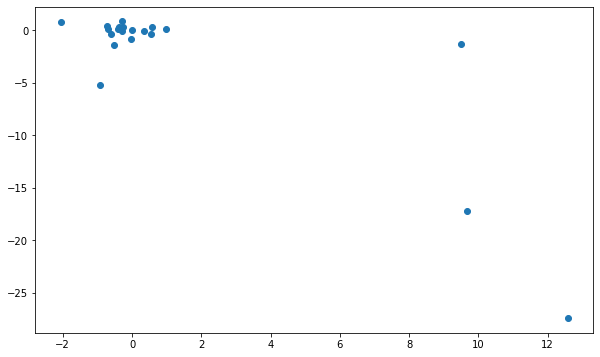

In [46]:
for j,sim in enumerate(arc2):
    if j == 1:
        break
    print(len(sim.particles))
    xs = []
    ys = []
    for i in range(len(sim.particles)):
        print(sim.particles[i].hash)
        print(sim.particles[i])
    for i in range(len(sim.particles)):
        xs.append(sim.particles[i].x)
        ys.append(sim.particles[i].y)
    fig,ax = plt.subplots(figsize=(10,6))
    #rebound.OrbitPlot(sim, fig=fig, ax=ax)

    plt.scatter(xs,ys)
    print(np.sqrt(np.array(xs)**2+np.array(ys)**2))